In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from pathlib import Path
import scipy.stats as st

In [2]:
# Load cleaned listings csv's for Oct 2022 and 2023
l_df23 = pd.read_csv("listings_oct_2023_clean.csv")
l_df22 = pd.read_csv("listings_oct_2022_clean.csv")

In [5]:
l_df23.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'price', 'room_type', 'accommodates',
       'amenities', 'minimum_nights', 'minimum_minimum_nights',
       'review_scores_rating', 'review_scores_location', 'license',
       'reviews_per_month'],
      dtype='object')

In [6]:
l_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40545 entries, 0 to 40544
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40545 non-null  int64  
 1   id                            40545 non-null  float64
 2   host_id                       40545 non-null  int64  
 3   host_listings_count           40522 non-null  float64
 4   neighbourhood_cleansed        40545 non-null  object 
 5   neighbourhood_group_cleansed  40545 non-null  object 
 6   latitude                      40545 non-null  float64
 7   longitude                     40545 non-null  float64
 8   property_type                 40545 non-null  object 
 9   price                         40545 non-null  object 
 10  room_type                     40545 non-null  object 
 11  accommodates                  40545 non-null  int64  
 12  amenities                     40545 non-null  object 
 13  m

In [7]:
# Build Dataframe to analyze minimum night listings
# Create bins
bins = ["1-29","30","30+"]
dfs = [l_df22, l_df23]
year = ["Before Ban - 2022", "After Ban - 2023"]
min_nights_df = pd.DataFrame()

min_nights_df["Minimum Nights"] = bins 
min_nights_df["Before Ban - 2022"] = ""
min_nights_df["After Ban - 2023"] = ""
        
for i in range(len(dfs)):
    #min_nights_df[year[i]][0] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]==0].count()
    min_nights_df[year[i]][0] = dfs[i]["minimum_nights"][(dfs[i]["minimum_nights"]>=1) & (dfs[i]["minimum_nights"]<30)].count()
    min_nights_df[year[i]][1] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]==30].count()
    min_nights_df[year[i]][2] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]>30].count()
    
min_nights_df.head()

,Minimum Nights,Before Ban - 2022,After Ban - 2023
0,1-29,21314,3227
1,30,17256,33273
2,30+,1975,2292


In [8]:
min_nights_df = min_nights_df.astype({"Before Ban - 2022": int, "After Ban - 2023": int})

min_nights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Minimum Nights     3 non-null      object
 1   Before Ban - 2022  3 non-null      int32 
 2   After Ban - 2023   3 non-null      int32 
dtypes: int32(2), object(1)
memory usage: 176.0+ bytes


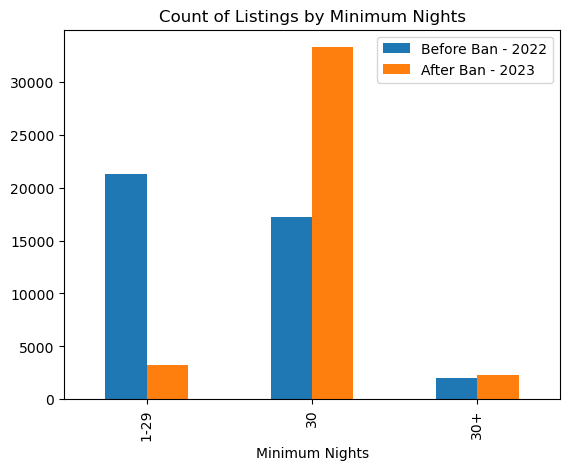

In [9]:
# side by side boxplot
min_nights_df.plot(x="Minimum Nights", y=["Before Ban - 2022","After Ban - 2023"], kind="bar", title="Count of Listings by Minimum Nights")


plt.show()

In [10]:
# Create dataframes for boxplots
x1 = l_df22["minimum_nights"][l_df22["minimum_nights"]<=100]
x2 = l_df23["minimum_nights"][l_df23["minimum_nights"]<=100]


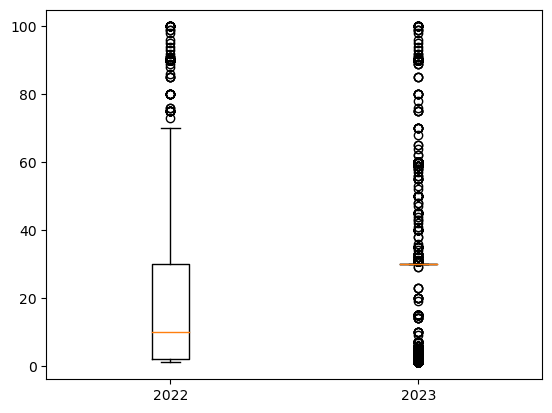

In [11]:
# Boxplots of minimum nights
plt.boxplot([x1, x2])
plt.xticks([1, 2], labels= ["2022", "2023"])

plt.show()

<font size="12">Neighboorhood Analysis</font>

In [3]:
rearrange_columns_22 = l_df22[["neighbourhood_group_cleansed","neighbourhood_cleansed","latitude","longitude","minimum_nights","price","review_scores_rating","review_scores_location"]]
rearrange_columns_22.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude,minimum_nights,price,review_scores_rating,review_scores_location
0,Brooklyn,Kensington,40.64529,-73.97238,30,$213.00,4.89,4.75
1,Manhattan,Midtown,40.75356,-73.98559,30,$175.00,4.68,4.81
2,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,30,$60.00,4.52,4.47
3,Brooklyn,Sunset Park,40.66265,-73.99454,21,$275.00,5.00,4.67
4,Bronx,Mott Haven,40.80635,-73.92201,30,$60.00,NaN,NaN


In [4]:
rearrange_columns_22_dropna = rearrange_columns_22.dropna()
rearrange_columns_22_dropna.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude,minimum_nights,price,review_scores_rating,review_scores_location
0,Brooklyn,Kensington,40.64529,-73.97238,30,$213.00,4.89,4.75
1,Manhattan,Midtown,40.75356,-73.98559,30,$175.00,4.68,4.81
2,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,30,$60.00,4.52,4.47
3,Brooklyn,Sunset Park,40.66265,-73.99454,21,$275.00,5.00,4.67
5,Manhattan,Midtown,40.76457,-73.98317,2,$68.00,4.24,4.88


In [5]:
rearrange_columns_23 = l_df23[["neighbourhood_group_cleansed","neighbourhood_cleansed","latitude","longitude","minimum_nights","price","review_scores_rating","review_scores_location"]]
rearrange_columns_23.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude,minimum_nights,price,review_scores_rating,review_scores_location
0,Brooklyn,Bushwick,40.68457,-73.91181,30,$65.00,4.80,4.80
1,Manhattan,Hell's Kitchen,40.76878,-73.98719,30,$110.00,NaN,NaN
2,Queens,Sunnyside,40.74343,-73.91865,30,$99.00,NaN,NaN
3,Brooklyn,Bedford-Stuyvesant,40.68180,-73.93121,45,$70.00,5.00,5.00
4,Brooklyn,Bedford-Stuyvesant,40.68209,-73.94279,30,$170.00,4.98,4.94


In [45]:
rearrange_columns_23_dropna = rearrange_columns_23.dropna()
rearrange_columns_23_dropna.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude,minimum_nights,price,review_scores_rating,review_scores_location
0,Brooklyn,Bushwick,40.68457,-73.91181,30,$65.00,4.80,4.80
3,Brooklyn,Bedford-Stuyvesant,40.68180,-73.93121,45,$70.00,5.00,5.00
4,Brooklyn,Bedford-Stuyvesant,40.68209,-73.94279,30,$170.00,4.98,4.94
5,Manhattan,East Village,40.72625,-73.98691,1,$140.00,4.43,4.85
6,Manhattan,East Village,40.72813,-73.98801,1,$125.00,4.29,4.80


<font size="5">Count of Listings by Boroughs 2022 vs 2023</font>

In [7]:
listing_count_22 = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()
listing_count_22

neighbourhood_group_cleansed
Bronx             1354
Brooklyn         12140
Manhattan        12703
Queens            5096
Staten Island      396
Name: neighbourhood_group_cleansed, dtype: int64

In [8]:
listing_count_23 = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()
listing_count_23

neighbourhood_group_cleansed
Bronx             1091
Brooklyn         10955
Manhattan        11105
Queens            4567
Staten Island      305
Name: neighbourhood_group_cleansed, dtype: int64

In [9]:
listing_count_vs = pd.DataFrame({
                              "2022": listing_count_22,
                              "2023": listing_count_23,
                             })
listing_count_vs

,2022,2023
neighbourhood_group_cleansed,,
Bronx,1354,1091
Brooklyn,12140,10955
Manhattan,12703,11105
Queens,5096,4567
Staten Island,396,305


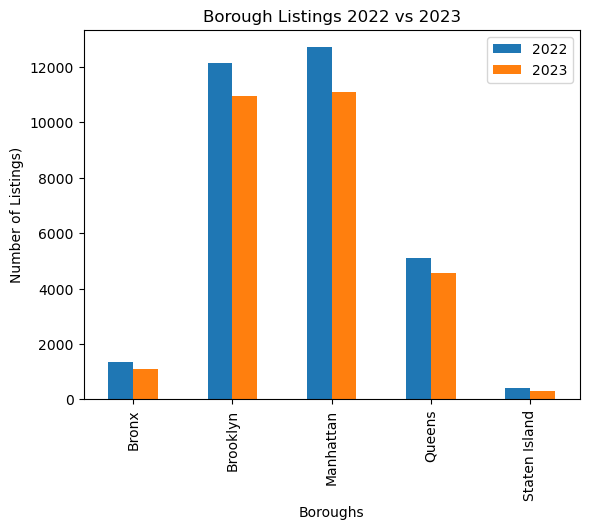

In [10]:
listing_count_vs.plot(kind="bar", title="Borough Listings 2022 vs 2023")
plt.ylabel("Number of Listings)")
plt.xlabel("Boroughs")


plt.show()

In [45]:
rearrange_columns_22_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31689 entries, 0 to 40543
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  31689 non-null  object 
 1   neighbourhood_cleansed        31689 non-null  object 
 2   latitude                      31689 non-null  float64
 3   longitude                     31689 non-null  float64
 4   price                         31689 non-null  object 
 5   review_scores_rating          31689 non-null  float64
 6   review_scores_location        31689 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.9+ MB


In [11]:
rearrange_columns_22_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)

C:\Users\minh_\AppData\Local\Temp\ipykernel_12140\2385549950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rearrange_columns_22_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)


In [12]:
hood_group_22_price = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["price"].mean().round(2)
hood_group_22_price

neighbourhood_group_cleansed
Bronx            126.78
Brooklyn         159.00
Manhattan        242.88
Queens           129.31
Staten Island    133.01
Name: price, dtype: float64

[Text(0, 0, 'Bronx'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Manhattan'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Staten Island')]

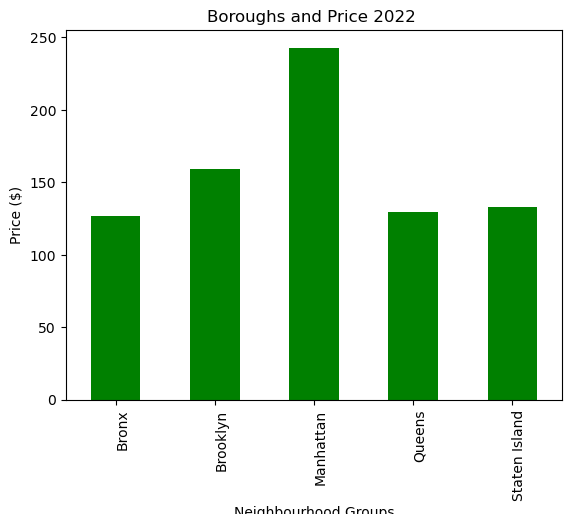

In [13]:
hood_group_price_bar22 = hood_group_22_price.plot(kind="bar", facecolor="green", xlabel="Neighbourhood Groups", ylabel="Price ($)")
xticklabels = hood_group_22_price.index
plt.title("Boroughs and Price 2022 ")
hood_group_price_bar22.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

In [49]:
rearrange_columns_23_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)
hood_group_23_price = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["price"].mean().round(2)
hood_group_23_price

C:\Users\minh_\AppData\Local\Temp\ipykernel_12140\3819372692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rearrange_columns_23_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)


neighbourhood_group_cleansed
Bronx            189.23
Brooklyn         183.87
Manhattan        182.63
Queens           191.97
Staten Island    237.98
Name: price, dtype: float64

[Text(0, 0, 'Bronx'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Manhattan'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Staten Island')]

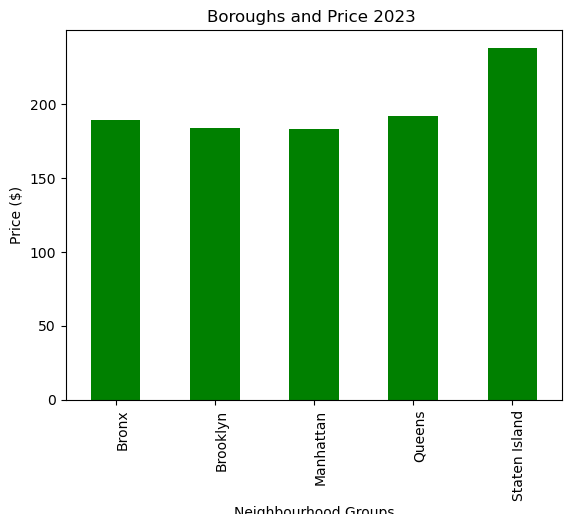

In [15]:
hood_group_price_bar23 = hood_group_23_price.plot(kind="bar", facecolor="green", xlabel="Neighbourhood Groups", ylabel="Price ($)")
xticklabels = hood_group_23_price.index
plt.title("Boroughs and Price 2023 ")
hood_group_price_bar23.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

<font size="5">Boroughs Price 2022 vs 2023</font>

In [16]:
borough_price = pd.DataFrame({
                              "2022": hood_group_22_price,
                              "2023": hood_group_23_price,
                             })
borough_price

,2022,2023
neighbourhood_group_cleansed,,
Bronx,126.78,189.23
Brooklyn,159.00,183.87
Manhattan,242.88,182.63
Queens,129.31,191.97
Staten Island,133.01,237.98


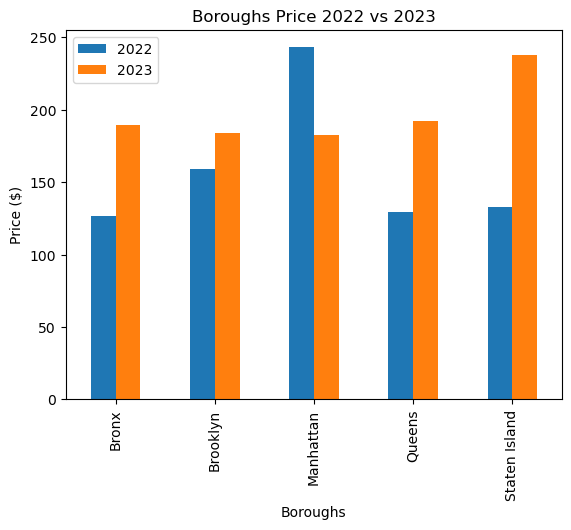

In [17]:
borough_price.plot(kind="bar", title="Boroughs Price 2022 vs 2023")
plt.ylabel("Price ($)")
plt.xlabel("Boroughs")


plt.show()

<font size="5">Neighboorhood VS Ratings 2022</font>

In [18]:
hood_group_22_rating = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["review_scores_rating"].mean()
hood_group_22_rating.sort_values(ascending=False)

neighbourhood_group_cleansed
Staten Island    4.742475
Brooklyn         4.733398
Bronx            4.687984
Queens           4.673206
Manhattan        4.669519
Name: review_scores_rating, dtype: float64

[Text(0, 0, 'Bronx'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Manhattan'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Staten Island')]

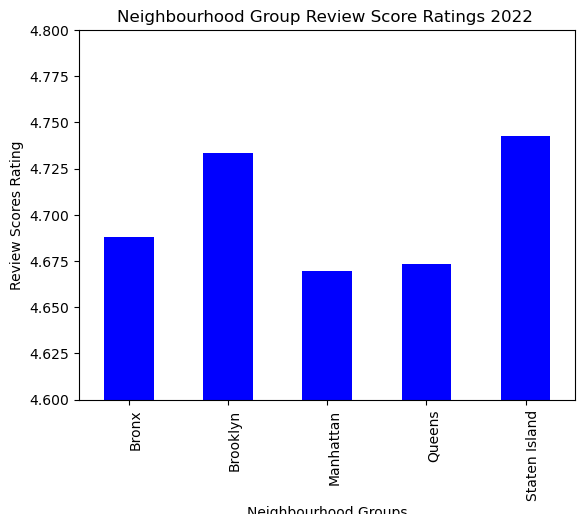

In [19]:
hood_group_rating_bar22 = hood_group_22_rating.plot(kind="bar", facecolor="blue", xlabel="Neighbourhood Groups", ylabel="Review Scores Rating", ylim = (4.6,4.8))
xticklabels = hood_group_22_rating.index
plt.title("Neighbourhood Group Review Score Ratings 2022 ")
hood_group_rating_bar22.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

In [20]:
hood_22_rating = rearrange_columns_22_dropna.groupby("neighbourhood_cleansed")["review_scores_rating"].mean()
hood_22_rating.sort_values(ascending=False).head(10)

neighbourhood_cleansed
Chelsea, Staten Island    5.000000
Hollis Hills              5.000000
Eltingville               4.975000
LaGuardia Airport         4.970000
Castleton Corners         4.952000
Prince's Bay              4.952000
Arden Heights             4.943333
Breezy Point              4.932500
South Beach               4.930000
Country Club              4.930000
Name: review_scores_rating, dtype: float64

[Text(0, 0, 'Allerton'),
 Text(1, 0, 'Arden Heights'),
 Text(2, 0, 'Arrochar'),
 Text(3, 0, 'Arverne'),
 Text(4, 0, 'Astoria'),
 Text(5, 0, 'Bath Beach'),
 Text(6, 0, 'Battery Park City'),
 Text(7, 0, 'Bay Ridge'),
 Text(8, 0, 'Bay Terrace'),
 Text(9, 0, 'Baychester'),
 Text(10, 0, 'Bayside'),
 Text(11, 0, 'Bayswater'),
 Text(12, 0, 'Bedford-Stuyvesant'),
 Text(13, 0, 'Belle Harbor'),
 Text(14, 0, 'Bellerose'),
 Text(15, 0, 'Belmont'),
 Text(16, 0, 'Bensonhurst'),
 Text(17, 0, 'Bergen Beach'),
 Text(18, 0, 'Bloomfield'),
 Text(19, 0, 'Boerum Hill'),
 Text(20, 0, 'Borough Park'),
 Text(21, 0, 'Breezy Point'),
 Text(22, 0, 'Briarwood'),
 Text(23, 0, 'Brighton Beach'),
 Text(24, 0, 'Broad Channel'),
 Text(25, 0, 'Bronx Park'),
 Text(26, 0, 'Bronxdale'),
 Text(27, 0, 'Brooklyn Heights'),
 Text(28, 0, 'Brownsville'),
 Text(29, 0, "Bull's Head"),
 Text(30, 0, 'Bushwick'),
 Text(31, 0, 'Cambria Heights'),
 Text(32, 0, 'Canarsie'),
 Text(33, 0, 'Carroll Gardens'),
 Text(34, 0, 'Castle Hill'),


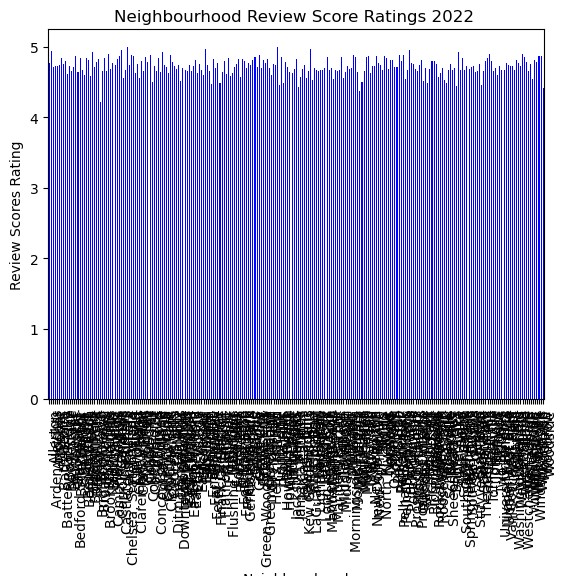

In [10]:
hood_rating_bar22 = hood_22_rating.plot(kind="bar", facecolor="blue", xlabel="Neighbourhood", ylabel="Review Scores Rating")
xticklabels = hood_22_rating.index
plt.title("Neighbourhood Review Score Ratings 2022 ")
hood_rating_bar22.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

In [21]:
hood_group_22_rating_location = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["review_scores_location"].mean()
hood_group_22_rating_location.sort_values(ascending=False)

neighbourhood_group_cleansed
Manhattan        4.799663
Brooklyn         4.710952
Queens           4.701299
Staten Island    4.696591
Bronx            4.581750
Name: review_scores_location, dtype: float64

[Text(0, 0, 'Bronx'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Manhattan'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Staten Island')]

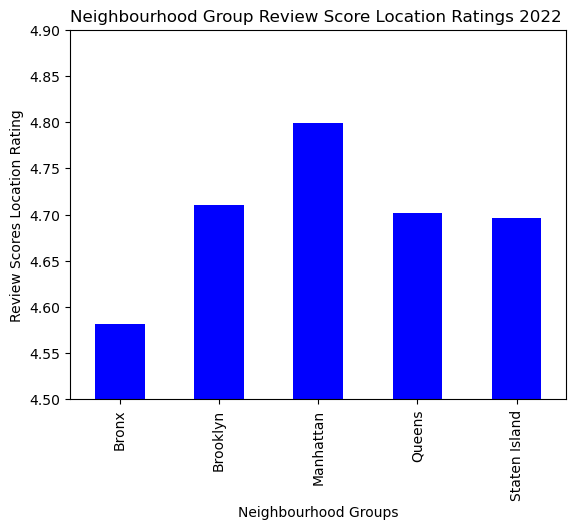

In [22]:
hood_group_rating_location_bar22 = hood_group_22_rating_location.plot(kind="bar", facecolor="blue", xlabel="Neighbourhood Groups", ylabel="Review Scores Location Rating", ylim = (4.5,4.9))
xticklabels = hood_group_22_rating.index
plt.title("Neighbourhood Group Review Score Location Ratings 2022 ")
hood_group_rating_bar22.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

In [23]:
hood_22_rating_location = rearrange_columns_22_dropna.groupby("neighbourhood_cleansed")["review_scores_location"].mean()
hood_22_rating_location.sort_values(ascending=False).head(10)

neighbourhood_cleansed
Hollis Hills         5.000000
Bull's Head          5.000000
Prospect Park        4.980000
LaGuardia Airport    4.970000
Woodrow              4.970000
NoHo                 4.970000
Brooklyn Heights     4.965224
Belle Harbor         4.964000
Arden Heights        4.963333
Greenwich Village    4.960592
Name: review_scores_location, dtype: float64

<font size="5">Neighboorhood VS Ratings 2023</font>

In [24]:
hood_group_23_rating = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["review_scores_rating"].mean()
hood_group_23_rating.sort_values(ascending=False)

neighbourhood_group_cleansed
Staten Island    4.770164
Brooklyn         4.729658
Bronx            4.687122
Queens           4.676166
Manhattan        4.661558
Name: review_scores_rating, dtype: float64

[Text(0, 0, 'Bronx'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Manhattan'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Staten Island')]

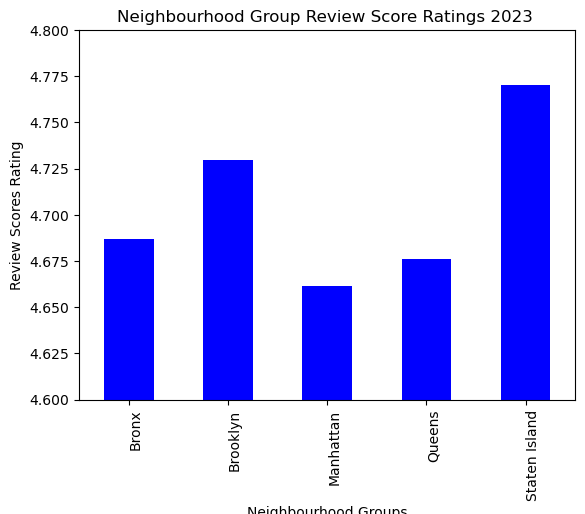

In [25]:
hood_group_rating_bar23 = hood_group_23_rating.plot(kind="bar", facecolor="blue", xlabel="Neighbourhood Groups", ylabel="Review Scores Rating", ylim = (4.6,4.8))
xticklabels = hood_group_23_rating.index
plt.title("Neighbourhood Group Review Score Ratings 2023 ")
hood_group_rating_bar23.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

In [26]:
hood_23_rating = rearrange_columns_23_dropna.groupby("neighbourhood_cleansed")["review_scores_rating"].mean()
hood_23_rating.sort_values(ascending=False).head(10)

neighbourhood_cleansed
Neponsit                  5.000000
Chelsea, Staten Island    5.000000
West Farms                5.000000
Navy Yard                 5.000000
Woodrow                   4.977500
Grymes Hill               4.952000
Breezy Point              4.945000
Randall Manor             4.940909
Country Club              4.940000
Belle Harbor              4.938571
Name: review_scores_rating, dtype: float64

In [27]:
hood_group_23_rating_location = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["review_scores_location"].mean()
hood_group_23_rating_location.sort_values(ascending=False)

neighbourhood_group_cleansed
Manhattan        4.781542
Staten Island    4.742721
Brooklyn         4.697028
Queens           4.687675
Bronx            4.561613
Name: review_scores_location, dtype: float64

[Text(0, 0, 'Bronx'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Manhattan'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Staten Island')]

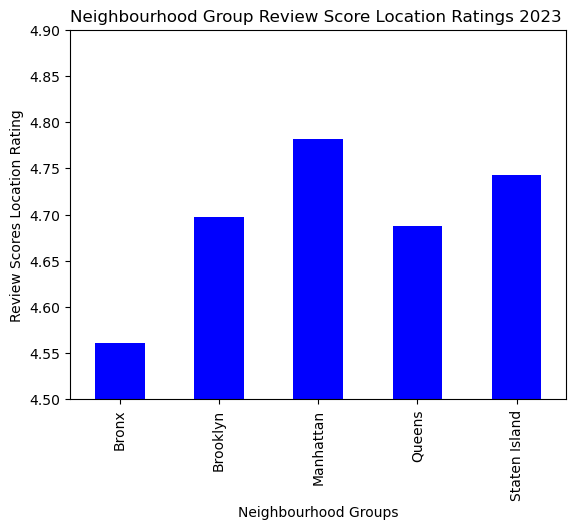

In [28]:
hood_group_rating_location_bar23 = hood_group_23_rating_location.plot(kind="bar", facecolor="blue", xlabel="Neighbourhood Groups", ylabel="Review Scores Location Rating", ylim = (4.5,4.9))
xticklabels = hood_group_23_rating.index
plt.title("Neighbourhood Group Review Score Location Ratings 2023 ")
hood_group_rating_bar22.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

In [29]:
hood_23_rating_location = rearrange_columns_23_dropna.groupby("neighbourhood_cleansed")["review_scores_location"].mean()
hood_23_rating_location.sort_values(ascending=False).head(10)

neighbourhood_cleansed
Little Neck               5.000000
Navy Yard                 5.000000
Chelsea, Staten Island    5.000000
Neponsit                  5.000000
Woodrow                   4.992500
Belle Harbor              4.970000
NoHo                      4.967308
Brooklyn Heights          4.965588
Huguenot                  4.960000
West Village              4.946873
Name: review_scores_location, dtype: float64

<font size="5">Borough Ratings 2022 vs 2023</font>

In [30]:
borough_rating = pd.DataFrame({
                              "2022": hood_group_22_rating,
                              "2023": hood_group_23_rating,
                             })
borough_rating

,2022,2023
neighbourhood_group_cleansed,,
Bronx,4.687984,4.687122
Brooklyn,4.733398,4.729658
Manhattan,4.669519,4.661558
Queens,4.673206,4.676166
Staten Island,4.742475,4.770164


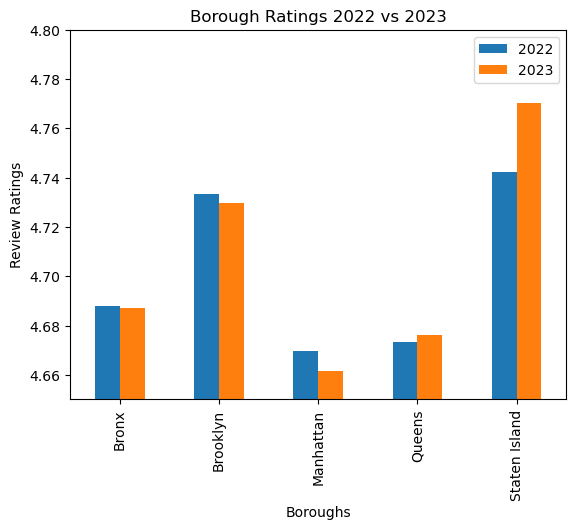

In [31]:
borough_rating.plot(kind="bar", title="Borough Ratings 2022 vs 2023", ylim=(4.65,4.8))
plt.ylabel("Review Ratings")
plt.xlabel("Boroughs")


plt.show()

<font size="5">Borough Location Ratings 2022 vs 2023</font>

In [32]:
borough_location_rating = pd.DataFrame({
                              "2022": hood_group_22_rating_location,
                              "2023": hood_group_23_rating_location,
                             })
borough_location_rating

,2022,2023
neighbourhood_group_cleansed,,
Bronx,4.581750,4.561613
Brooklyn,4.710952,4.697028
Manhattan,4.799663,4.781542
Queens,4.701299,4.687675
Staten Island,4.696591,4.742721


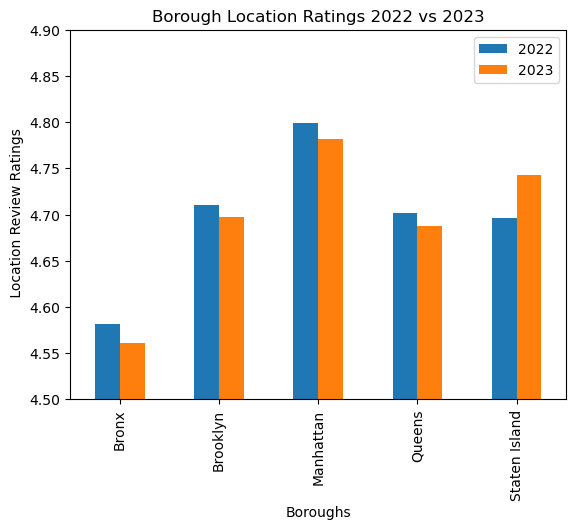

In [33]:
borough_location_rating.plot(kind="bar", title="Borough Location Ratings 2022 vs 2023", ylim=(4.5,4.9))
plt.ylabel(" Location Review Ratings")
plt.xlabel("Boroughs")


plt.show()

<font size="5">Boroughs Minimum Nights (<30 nights) 2022</font>

In [34]:
mini_night_1to29_2022 = rearrange_columns_22_dropna[rearrange_columns_22_dropna["minimum_nights"]<30]
mini_night_1to29_2022 = mini_night_1to29_2022.groupby("neighbourhood_group_cleansed")["minimum_nights"].count()
mini_night_1to29_2022

neighbourhood_group_cleansed
Bronx            1128
Brooklyn         7197
Manhattan        6398
Queens           3560
Staten Island     334
Name: minimum_nights, dtype: int64

<font size="5">Boroughs Minimum Nights (<30 nights) 2023</font>

In [35]:
mini_night_1to29_2023 = rearrange_columns_23_dropna[rearrange_columns_23_dropna["minimum_nights"]<30]
mini_night_1to29_2023 = mini_night_1to29_2023.groupby("neighbourhood_group_cleansed")["minimum_nights"].count()
mini_night_1to29_2023

neighbourhood_group_cleansed
Bronx              36
Brooklyn          340
Manhattan        1426
Queens            173
Staten Island      12
Name: minimum_nights, dtype: int64

In [36]:
borough_mini_nights = pd.DataFrame({
                              "2022": mini_night_1to29_2022,
                              "2023": mini_night_1to29_2023,
                             })
borough_mini_nights

,2022,2023
neighbourhood_group_cleansed,,
Bronx,1128,36
Brooklyn,7197,340
Manhattan,6398,1426
Queens,3560,173
Staten Island,334,12


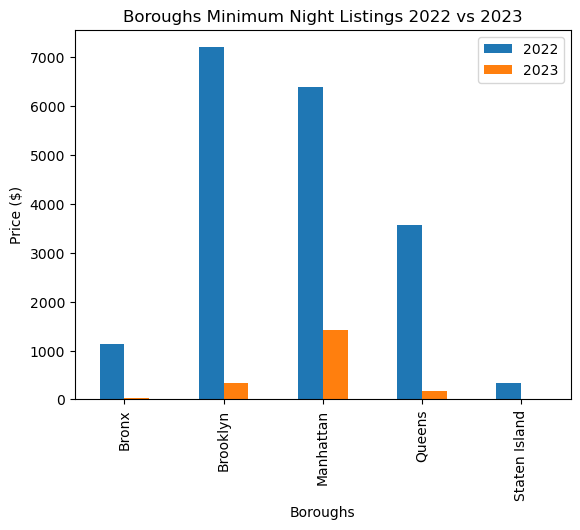

In [114]:
borough_mini_nights.plot(kind="bar", title="Boroughs Minimum Night Listings 2022 vs 2023")
plt.ylabel("Number of Listing")
plt.xlabel("Boroughs")


plt.show()

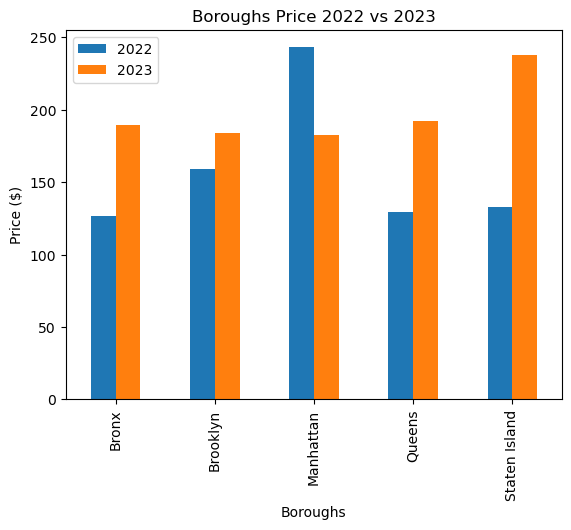

In [37]:
borough_price.plot(kind="bar", title="Boroughs Price 2022 vs 2023")
plt.ylabel("Price ($)")
plt.xlabel("Boroughs")


plt.show()

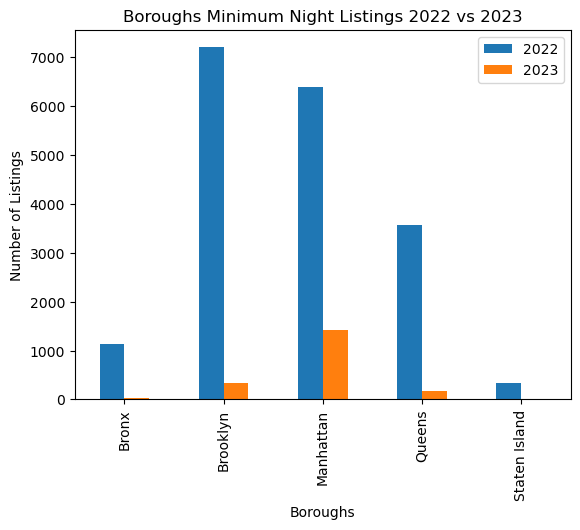

In [38]:
borough_mini_nights.plot(kind="bar", title="Boroughs Minimum Night Listings 2022 vs 2023")
plt.ylabel("Number of Listings")
plt.xlabel("Boroughs")


plt.show()

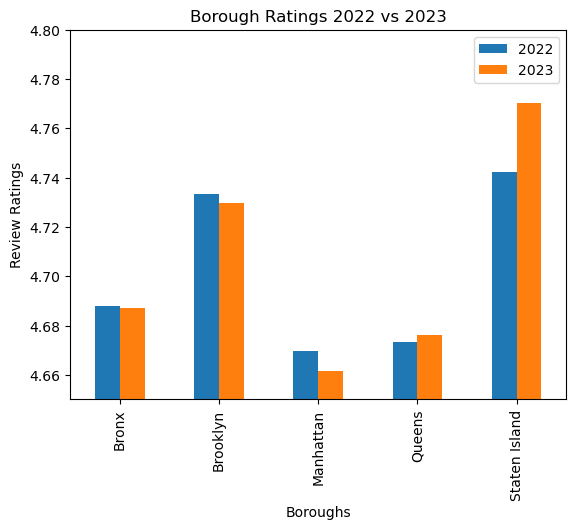

In [39]:
borough_rating.plot(kind="bar", title="Borough Ratings 2022 vs 2023", ylim=(4.65,4.8))
plt.ylabel("Review Ratings")
plt.xlabel("Boroughs")


plt.show()

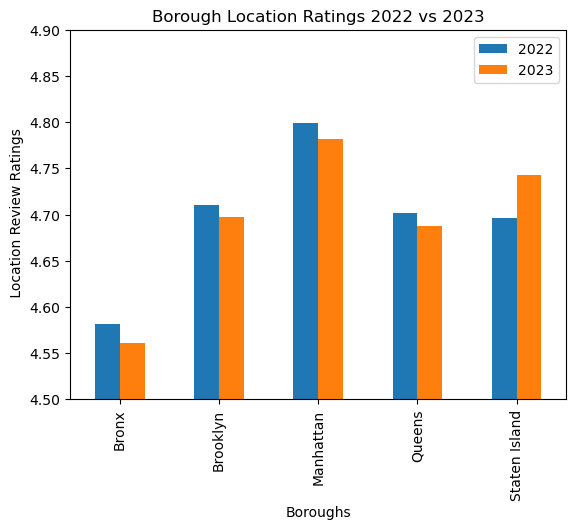

In [40]:
borough_location_rating.plot(kind="bar", title="Borough Location Ratings 2022 vs 2023", ylim=(4.5,4.9))
plt.ylabel(" Location Review Ratings")
plt.xlabel("Boroughs")


plt.show()

<font size="5">Boroughs Price and Rating correlation</font>

The correlation between listing price and the review rating 0.02


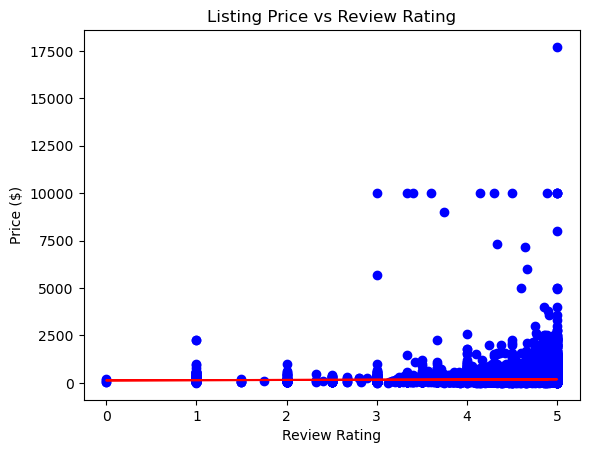

In [42]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_22 = st.pearsonr(rearrange_columns_22_dropna["review_scores_rating"],rearrange_columns_22_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_22[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_22_dropna["review_scores_rating"]
y_values = rearrange_columns_22_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Review Rating")
plt.show()

In [61]:
# Calculate the correlation coefficient and a linear regression model 
rearrange_columns_23_dropna["price"] = rearrange_columns_23_dropna["price"].dropna()
boroughs_correlation_coefficient_23 = st.pearsonr(rearrange_columns_23_dropna["review_scores_rating"],rearrange_columns_23_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_23[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_23_dropna["review_scores_rating"]
y_values = rearrange_columns_23_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Review Rating")
plt.show()

C:\Users\minh_\AppData\Local\Temp\ipykernel_12140\875255697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rearrange_columns_23_dropna["price"] = rearrange_columns_23_dropna["price"].dropna()
C:\Users\minh_\anaconda3\envs\dev\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


The correlation between listing price and the review rating nan


TypeError: unsupported operand type(s) for +: 'method' and 'method'